# Build a reinforcement learning environment for a virtual PIV setup

***

In [1]:
from pykitPIV.ml import PIVEnv
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc

/Users/kamilazdybal/anaconda3/envs/latest-stack/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/kamilazdybal/anaconda3/envs/latest-stack/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <6A7076EE-85BD-37A7-BC35-1D4867F2B3D3> /Users/kamilazdybal/anaconda3/envs/latest-stack/lib/python3.10/site-packages/torchvision/image.so
  Expected in:     <A84DFEFF-287E-3B94-A7DB-731FA5F9CBBC> /Users/kamilazdybal/anaconda3/envs/latest-stack/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
2025-02-04 16:35:31.459631: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow 

Prepare specs for pykitPIV parameters:

In [2]:
particle_spec = {'diameters': (1, 1),
                 'distances': (2, 2),
                 'densities': (0.2, 0.2),
                 'diameter_std': 1,
                 'seeding_mode': 'random'}

flowfield_spec = {'flowfield_size': (500, 1000),
                  'flowfield_type': 'random smooth',
                  'gaussian_filters': (30, 30),
                  'n_gaussian_filter_iter': 5,
                  'displacement': (2, 2)}

motion_spec = {'n_steps': 10,
               'time_separation': 5,
               'particle_loss': (0, 2),
               'particle_gain': (0, 2)}

image_spec = {'exposures': (0.5, 0.9),
              'maximum_intensity': 2**16-1,
              'laser_beam_thickness': 1,
              'laser_over_exposure': 1,
              'laser_beam_shape': 0.95,
              'alpha': 1/8,
              'clip_intensities': True,
              'normalize_intensities': False}

Initialize the `Gymnasium` environment:

In [3]:
env = PIVEnv(interrogation_window_size=(100,200),
             interrogation_window_size_buffer=10,
             particle_spec=particle_spec,
             motion_spec=motion_spec,
             image_spec=image_spec,
             flowfield_spec=flowfield_spec,
             user_flowfield=None,
             random_seed=100)

In [4]:
env.observation_space.sample()

array([217, 249])

In [5]:
camera_position = env.observation_space.sample()

In [6]:
camera_position

array([153,  35])

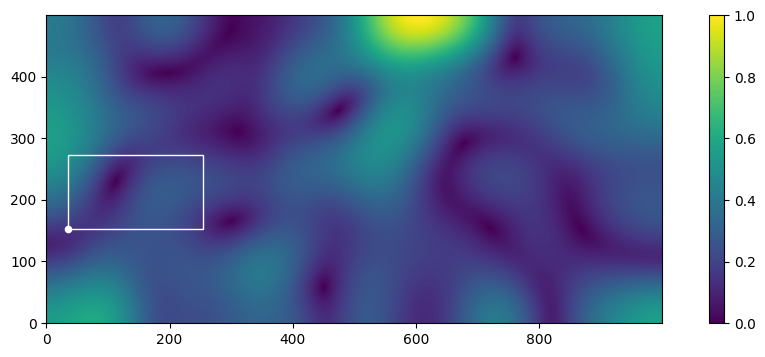

In [7]:
plt = env.render(camera_position,
                 c='white',
                 s=20,
                 lw=1,
                 figsize=(12,4), 
                 filename='ml_PIVEnv_render.png')

In [ ]:
image_obj = env.record_particles(camera_position)

In [ ]:
plt.imshow(image_obj.images_I1[0,0,:,:], cmap='Greys_r', origin='lower')

In [ ]:
plt.imshow(image_obj.images_I2[0,0,:,:], cmap='Greys_r', origin='lower')

In [ ]:
image_obj.plot_field_magnitude(0, 
                               add_streamplot=True,
                               streamplot_density=1,
                               streamplot_color='k',)

In [ ]:
image_obj.animate_image_pair(0, filename='image.gif')

***